Install libraries

In [ ]:
!pip install git+https://github.com/maxymnaumchyk/awkward-zipper.git

  Cloning https://github.com/maxymnaumchyk/awkward-zipper.git to /tmp/pip-req-build-tp33qsvu
  Running command git clone --filter=blob:none --quiet https://github.com/maxymnaumchyk/awkward-zipper.git /tmp/pip-req-build-tp33qsvu
  Resolved https://github.com/maxymnaumchyk/awkward-zipper.git to commit c25fb3750b9427350f0bad9c7cc5f9cd32ecc25c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/scikit-hep/awkward (to revision main) to /tmp/pip-install-jm9o4r5l/awkward_c262c2534fb24530826bc9a475dc0ab3
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-hep/awkward /tmp/pip-install-jm9o4r5l/awkward_c262c2534fb24530826bc9a475dc0ab3
  Resolved https://github.com/scikit-hep/awkward to commit 2ca5ccd578d901e7dcfea1cde13c2ac79b13f872
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements t

Use a branch from main to load virtual arrays with uproot

In [ ]:
!pip install uproot@git+https://github.com/scikit-hep/uproot5@pfackeldey/uproot_lazy

  Cloning https://github.com/scikit-hep/uproot5 (to revision pfackeldey/uproot_lazy) to /tmp/pip-install-9ex8lpfo/uproot_3a481f3a5c354b15a636759f85f9aec0
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-hep/uproot5 /tmp/pip-install-9ex8lpfo/uproot_3a481f3a5c354b15a636759f85f9aec0
  Running command git checkout -b pfackeldey/uproot_lazy --track origin/pfackeldey/uproot_lazy
  Switched to a new branch 'pfackeldey/uproot_lazy'
  Branch 'pfackeldey/uproot_lazy' set up to track remote branch 'pfackeldey/uproot_lazy' from 'origin'.
  Resolved https://github.com/scikit-hep/uproot5 to commit f9788f77c681e91e7f31b5ba75cbf34b81ea35ba
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for uproot: filename=uproot-5.6.4.dev31+gf9788f7-py3-none-any.whl size=384282 sha256=a4e40280a919554bf642f731056888050d0cbac5d482179928e661474bfb4b01
  Stored in directory: /tmp/pip-eph

Download test root file

In [ ]:
!wget {'https://raw.githubusercontent.com/scikit-hep/coffea/refs/heads/master/tests/samples/nano_dy.root'}

--2025-08-03 20:40:17--  https://raw.githubusercontent.com/scikit-hep/coffea/refs/heads/master/tests/samples/nano_dy.root
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 352599 (344K) [application/octet-stream]
Saving to: ‘nano_dy.root’

nano_dy.root        100%[===================>] 344.33K  --.-KB/s    in 0.04s   

2025-08-03 20:40:17 (9.03 MB/s) - ‘nano_dy.root’ saved [352599/352599]



Import libraries

In [ ]:
import uproot
import awkward

Let's load the example data in [NanoAOD](https://twiki.cern.ch/twiki/bin/view/CMSPublic/WorkBookNanoAOD) format:

In [ ]:
# Create a TTree from root
tree = uproot.open("nano_dy.root")["Events"]
# TTree -> awkward.Array[awkward.Record[str, awkward.Array]]
array = tree.arrays(ak_add_doc=True)

In [ ]:
array.show()

[{run: 1, luminosityBlock: 13889, event: 3749778, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749762, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749777, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749768, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749761, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749773, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749781, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749786, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749788, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749783, HTXS_Higgs_pt: 0, ...},
 ...,
 {run: 1, luminosityBlock: 13889, event: 3749862, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749866, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889, event: 3749861, HTXS_Higgs_pt: 0, ...},
 {run: 1, luminosityBlock: 13889

The resulting data is a list of records. Each record represents a single event and all of its parameters data. For example here's some of the data for the first event in our file:

In [ ]:
array[0].show(50)

{run: 1,
 luminosityBlock: 13889,
 event: 3749778,
 HTXS_Higgs_pt: 0,
 HTXS_Higgs_y: nan,
 HTXS_stage1_1_cat_pTjet25GeV: 0,
 HTXS_stage1_1_cat_pTjet30GeV: 0,
 HTXS_stage1_1_fine_cat_pTjet25GeV: 0,
 HTXS_stage1_1_fine_cat_pTjet30GeV: 0,
 HTXS_stage_0: 0,
 HTXS_stage_1_pTjet25: 0,
 HTXS_stage_1_pTjet30: 0,
 HTXS_njets25: 0,
 HTXS_njets30: 0,
 btagWeight_CSVV2: 0.951,
 btagWeight_DeepCSVB: 0.893,
 CaloMET_phi: 2.79,
 CaloMET_pt: 32.1,
 CaloMET_sumEt: 652,
 ChsMET_phi: 2.51,
 ChsMET_pt: 33.7,
 ChsMET_sumEt: 784,
 nCorrT1METJet: 5,
 CorrT1METJet_area: [0.579, 0.449, 0.509, 0.519, 0.638],
 CorrT1METJet_eta: [-2.36, 4.33, 2.27, 3.92, 2.62],
 CorrT1METJet_muonSubtrFactor: [3.59e-08, 1.08e-08, ..., 7.16e-09, -2.98e-08],
 CorrT1METJet_phi: [0.387, 2.03, 1.56, 2.39, -0.405],
 CorrT1METJet_rawPt: [12.9, 15.3, 10.2, 14.9, 9.41],
 nElectron: 0,
 Electron_deltaEtaSC: [],
 Electron_dr03EcalRecHitSumEt: [],
 Electron_dr03HcalDepth1TowerSumEt: [],
 Electron_dr03TkSumPt: [],
 Electron_dr03TkSumPtHEEP: []

## Awkward-zipper example usage

The goal of the awkward-zipper package is to restructure the record of each event. These records are restructured in the same manner as in [Coffea package](https://coffea-hep.readthedocs.io/en/v2025.1.1/api/coffea.nanoevents.NanoAODSchema.html).

In [ ]:
from awkward_zipper import NanoAOD

restructure = NanoAOD(version="latest")
result = restructure(array)

/tmp/ipython-input-1056997857.py:4: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  result = restructure(array)
/tmp/ipython-input-1056997857.py:4: RuntimeWarning: Missing cross-reference index for LowPtElectron_genPartIdx => GenPart
  result = restructure(array)
/tmp/ipython-input-1056997857.py:4: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  result = restructure(array)
/tmp/ipython-input-1056997857.py:4: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  result = restructure(array)
/usr/local/lib/python3.11/dist-packages/awkward_zipper/kernels.py:144: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  out[i::n] = idx


In [ ]:
awkward.materialize(result)
result

<NanoEventsArray [<NanoAOD event>, ...] type='40 * event'>

Now let's go step by step how awkward-zipper reconstructs the original NanoAOD data.

## How the new fields are added


In [ ]:
from awkward_zipper.kernels import (
    counts2offsets,
    local2globalindex,
)

For example we have a local index branches with names matching `{source}_{target}Idx*` are converted to global indexes for the event chunk (postfix `G`).
(All local indices and their correlating global indices are taken from `NanoAOD.all_cross_references` dictionary)

In [ ]:
local_index = 'Jet_electronIdx1'

# cross_referense = NanoAOD.all_cross_references[local_index]
# global_index = "n" + cross_referense
global_index = 'nElectron'

array["Jet_electronIdx1G"] = local2globalindex(array[local_index], array[global_index])
array["Jet_electronIdx1G"]

<Array [[-1, -1, -1, -1, -1], ..., [-1, ...]] type='40 * [var * int64, para...'>

How the functions like local2globalindex work is the main difference between awkward-zipper and coffea.

awkward-zipper does its inner calculations on awkward arrays, while coffea does them using [forms and buffers](https://awkward-array.org/doc/main/reference/generated/ak.to_buffers.html).

This change will make it easier for users to create their own ‘schemas’ (or modify existing ones)

## These fields are then grouped by name, where if:

one branch exists named name and no branches start with name_, it gets interpreted as a single flat array;

In [ ]:
# Example: Each event has only one Run Id. Interpreted flat array will look look like this:
result.run

<Array [1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1] type='40 * uint32[parameters=...'>

one branch exists named name, one named n{name}, and no branches start with name_, it gets interpreted as a single jagged array;

In [ ]:
# Example: Each event has a flat array of PS Weights. Interpreted single jagged array will look look like this:
result.PSWeight

<Array [[1.01, 1.26, 0.99, 0.791], ..., [...]] type='40 * [var * float32, p...'>

no branch exists named {name} and many branches start with name_*, they get interpreted as a flat table; or

In [ ]:
#Example: Each event has a SINGLE Generator. Each Generator consists of a record of Generator parameters. These parameters can be scalars or flat arrays. Interpreted flat table will look look like this:
result.Generator

<NanoCollectionArray [{scalePDF: 95.4, id1: 1, ...}, ...] type='40 * NanoCo...'>

one branch exists named n{name} and many branches start with name_*, they interpreted as a jagged table.

In [ ]:
# Example: Each event has an array of Jets. Each Jet consists of a record of Jet parameters. These parameters can be scalars or flat arrays. Interpreted jagged table will look look like this:
result.Jet

<JetArray [[Jet, ..., Jet], ...] type='40 * var * Jet[mass: float32[paramet...'>

Finally, all collections are then zipped into one NanoEvents record and returned.

Final result:

In [ ]:
result

<NanoEventsArray [<NanoAOD event>, ...] type='40 * event'>

In [ ]:
result.Jet.mass

<Array [[11.7, 8.94, ..., 3.81, 4.23], ...] type='40 * var * float32[parame...'>

## Zipper with virtual arrays

Let's load the same root file but as virtual arrays. Virtual arrays don't load the data from disk (or in other words don't materialize the data).

In [ ]:
# Create a TTree from root
tree = uproot.open("nano_dy.root")["Events"]
# to load virtual arrays
access_log = [] # which of the data was materialized
# TTree -> awkward.Array[awkward.Record[str, awkward.Array]]
array = tree.virtual_arrays(ak_add_doc=True, access_log=access_log)

Calling zipper

In [ ]:
restructure = NanoAOD(version="latest")
result = restructure(array)

/tmp/ipython-input-3166504516.py:2: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  result = restructure(array)
/tmp/ipython-input-3166504516.py:2: RuntimeWarning: Missing cross-reference index for LowPtElectron_genPartIdx => GenPart
  result = restructure(array)
/tmp/ipython-input-3166504516.py:2: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  result = restructure(array)
/tmp/ipython-input-3166504516.py:2: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  result = restructure(array)


In [ ]:
access_log

[]

In [ ]:
result

<NanoEventsArray [<NanoAOD event>, ...] type='40 * event'>

In [ ]:
result.Jet

<JetArray [??, ??, ??, ??, ..., ??, ??, ??, ??] type='40 * var * Jet[mass: ...'>

In [ ]:
result[0].Jet

<JetArray [Jet, ...] type='5 * Jet[mass: float32[parameters={"__doc__": "ma...'>

In [ ]:
access_log

[Accessed(branch='nJet', buffer_key="('<root>', 'nJet')-data")]

In [ ]:
array.nJet

<Array [5, 8, 5, 3, 5, 8, ..., 2, 3, 1, 6, 2] type='40 * uint32[parameters=...'>

## Example calculation of a Z-peak

In [ ]:
zcands = awkward.combinations(result.Muon, 2)

In [ ]:
access_log

[Accessed(branch='nMuon', buffer_key="('<root>', 'nMuon')-data")]

In [ ]:
# count invariant mass
mass = awkward.flatten((zcands["0"] + zcands["1"]).mass)

We can see that for this, 4-vector coordinates were loaded, which were used to add the combinations

In [ ]:
access_log

[Accessed(branch='nMuon', buffer_key="('<root>', 'nMuon')-data"),
 Accessed(branch='Muon_pt', buffer_key="('<root>', 'Muon_pt', None)-data"),
 Accessed(branch='Muon_phi', buffer_key="('<root>', 'Muon_phi', None)-data"),
 Accessed(branch='Muon_eta', buffer_key="('<root>', 'Muon_eta', None)-data"),
 Accessed(branch='Muon_mass', buffer_key="('<root>', 'Muon_mass', None)-data"),
 Accessed(branch='Muon_charge', buffer_key="('<root>', 'Muon_charge', None)-data")]

In [ ]:
%%capture
!pip install "hist[plot]"

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f954fb1f510>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

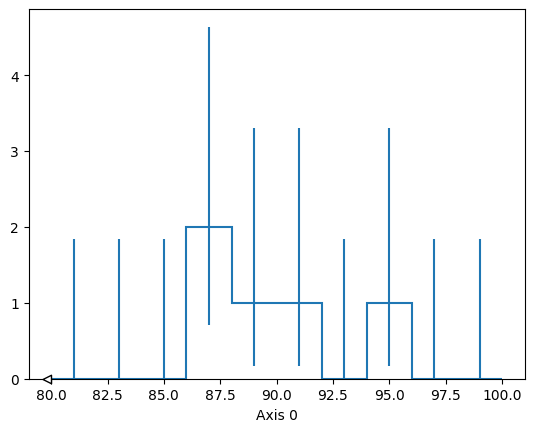

In [ ]:
from hist import Hist

Hist.new.Reg(10, 80, 100).Double().fill(mass).plot()

In [ ]:
result.Muon

<MuonArray [[], [], [], [], ..., [], [], [], []] type='40 * var * Muon[mvaT...'>

In [ ]:
result.Muon[4][0].show(300)

{mvaTTH: ??,
 triggerIdLoose: ??,
 pfRelIso03_chg: ??,
 genPartIdx: ??,
 dz: ??,
 softMva: ??,
 charge: -1,
 tightId: ??,
 jetIdx: ??,
 miniPFRelIso_all: ??,
 isPFcand: ??,
 looseId: ??,
 dxy: ??,
 mediumId: ??,
 ip3d: ??,
 tunepRelPt: ??,
 mvaId: ??,
 inTimeMuon: ??,
 multiIsoId: ??,
 eta: 0.714,
 sip3d: ??,
 genPartFlav: ??,
 jetRelIso: ??,
 pfIsoId: ??,
 cleanmask: ??,
 pt: 76.8,
 highPtId: ??,
 phi: 1.64,
 dxyErr: ??,
 nStations: ??,
 tkRelIso: ??,
 nTrackerLayers: ??,
 mvaLowPt: ??,
 mass: 0.106,
 segmentComp: ??,
 pfRelIso03_all: ??,
 softId: ??,
 miniIsoId: ??,
 tkIsoId: ??,
 fsrPhotonIdx: ??,
 pdgId: ??,
 jetPtRelv2: ??,
 dzErr: ??,
 mediumPromptId: ??,
 softMvaId: ??,
 miniPFRelIso_chg: ??,
 pfRelIso04_all: ??,
 isGlobal: ??,
 tightCharge: ??,
 isTracker: ??,
 ptErr: ??,
 genPartIdxG: ??,
 jetIdxG: ??,
 fsrPhotonIdxG: ??}
